<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/ARIMA_blackcoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [203]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima



import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## colmns 정리

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/blackcoal_combine.csv", encoding = 'utf-8-sig')

In [ ]:
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,China_Electricity from wind (TWh),China_Electricity from nuclear (TWh),India_Electricity from coal (TWh),India_Electricity from gas (TWh),India_Electricity from hydro (TWh),India_Electricity from other renewables including bioenergy (TWh),India_Electricity from solar (TWh),India_Electricity from oil (TWh),India_Electricity from wind (TWh),India_Electricity from nuclear (TWh)
0,2019-12-29,67.50,93.41,68.60,6129.5,63.05,63.10,33.07,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22


In [ ]:
# df= df.rename(columns={'Unnamed: 0':'date'})

In [ ]:
# 전체 컬럼명 확인

#pd.set_option('display.max_seq_items', 10)
col_names = df.columns.tolist()
print(df.columns)

Index(['date', 'Coal_price', 'iron', 'Brent_fut', 'copper_fut', 'WTI_fut',
       'WTI', 'LNG_fut', 'KPPI', 'ACPI', 'KCPI', 'APPI', 'APPI2', 'bdi',
       'South Korea_Electricity from coal (TWh)',
       'South Korea_Electricity from gas (TWh)',
       'South KoreaElectricity from hydro (TWh)',
       'South Korea_Electricity from other renewables including bioenergy (TWh)',
       'South Korea_Electricity from solar (TWh)',
       'South Korea_Electricity from oil (TWh)',
       'South Korea_Electricity from wind (TWh)',
       'South Korea_Electricity from nuclear (TWh)',
       'Japan_Electricity from coal (TWh)', 'Japan_Electricity from gas (TWh)',
       'Japan_Electricity from hydro (TWh)',
       'Japan_Electricity from other renewables including bioenergy (TWh)',
       'Japan_Electricity from solar (TWh)',
       'Japan_Electricity from oil (TWh)', 'Japan_Electricity from wind (TWh)',
       'Japan_Electricity from nuclear (TWh)',
       'China_Electricity from coal (TWh)', '

In [ ]:
col_names = pd.DataFrame(col_names)
col_names

,0
0,date
1,Coal_price
2,iron
3,Brent_fut
4,copper_fut
5,WTI_fut
6,WTI
7,LNG_fut
8,KPPI
9,ACPI


In [ ]:
col_names.to_csv('/content/gdrive/My Drive/Black_coal/data/dataset/blackcoal_colname.csv', index = True, encoding = 'utf-8-sig')

# 1차 차분 (for문 사용)
 정상성을 만족하는 데이터 만들기

## stationary 시각화 확인

In [205]:
df1 = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/blackcoal_combine.csv", encoding = 'utf-8-sig')
df1

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,China_Electricity from wind (TWh),China_Electricity from nuclear (TWh),India_Electricity from coal (TWh),India_Electricity from gas (TWh),India_Electricity from hydro (TWh),India_Electricity from other renewables including bioenergy (TWh),India_Electricity from solar (TWh),India_Electricity from oil (TWh),India_Electricity from wind (TWh),India_Electricity from nuclear (TWh)
0,2019-12-29,67.50,93.41,68.60,6129.5,63.05,63.10,33.07,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22


In [206]:
df1 = df1.sort_values('date')
df1

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,China_Electricity from wind (TWh),China_Electricity from nuclear (TWh),India_Electricity from coal (TWh),India_Electricity from gas (TWh),India_Electricity from hydro (TWh),India_Electricity from other renewables including bioenergy (TWh),India_Electricity from solar (TWh),India_Electricity from oil (TWh),India_Electricity from wind (TWh),India_Electricity from nuclear (TWh)
469,2011-01-02,136.35,173.50,93.33,9436.0,88.03,88.48,56.16,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16


In [207]:
df1['date'] = pd.to_datetime(df1['date'])

test = df1[(df1['date'] >= '2019-01-01')]
lag_size = (test['date'].max() - test['date'].min())
print('Min date from test set : %s' % test['date'].min().date())
print('Max date from test set : %s' % test['date'].max().date())
print('Forecast lag size', lag_size)



ts = df1.iloc[:,[0,1]]
ts['date'] = pd.to_datetime(ts['date'])
ts = ts.set_index('date')
ts

Min date from test set : 2019-01-06
Max date from test set : 2019-12-29
Forecast lag size 357 days 00:00:00


,Coal_price
date,
2011-01-02,136.35
2011-01-09,136.00
2011-01-16,131.90
2011-01-23,130.35
2011-01-30,127.00
...,...
2019-12-01,66.40
2019-12-08,66.30
2019-12-15,66.35


<Figure size 432x288 with 0 Axes>

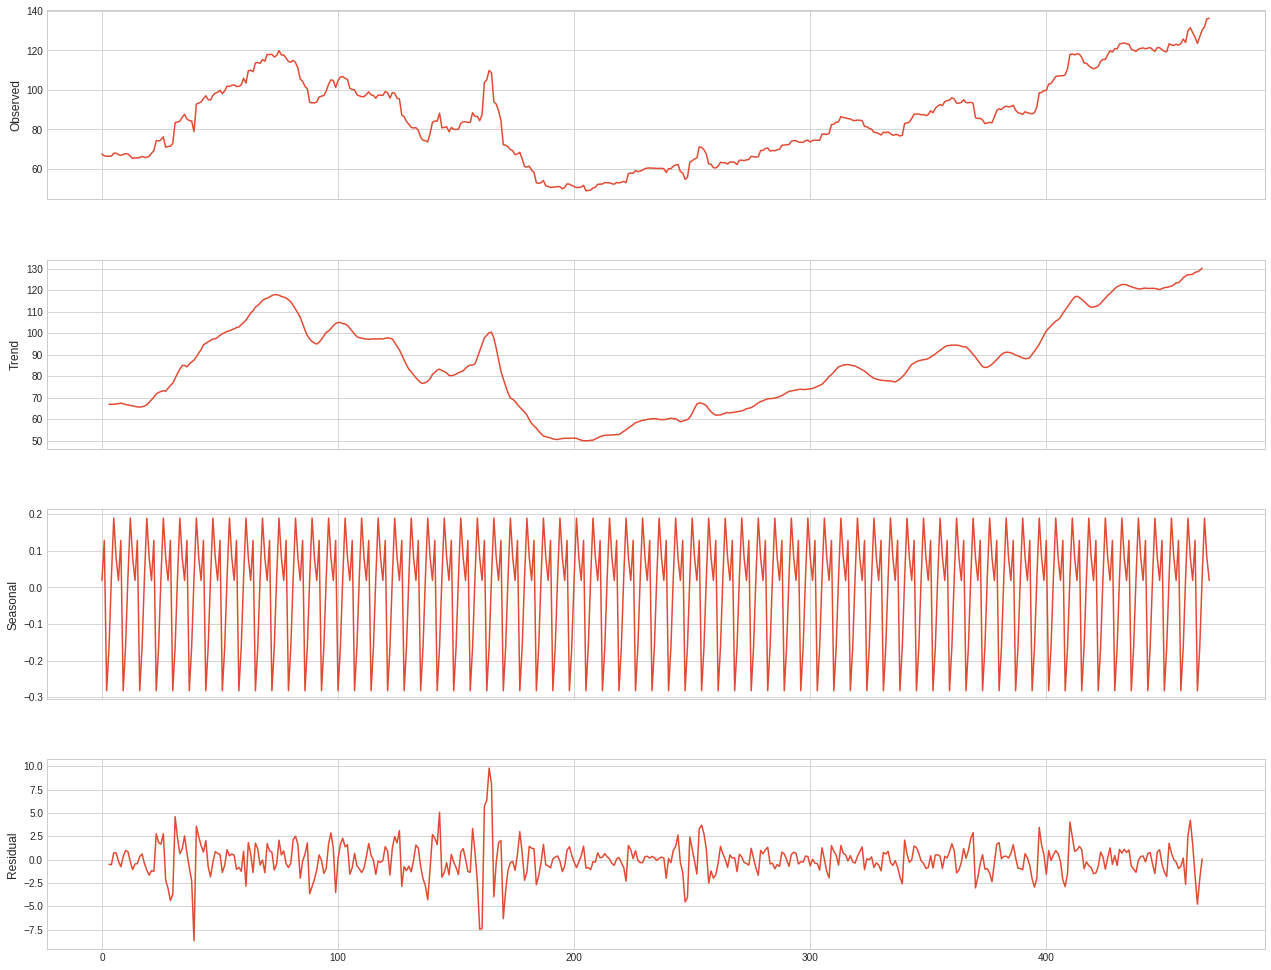

In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1.iloc[:,1], model='additive', freq =7)
# freq에 들어가는 주기는 계절성을 주기를 기반으로 설정해준다. 분기별은 4, 월별데이터는 12, 주별 패턴이 있는 일별 데이터는 7로 설정해서 보면서 맞춰가야함/1년이면 365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

In [ ]:
# 패턴이 보인다면 정상성이 의심된다. 이를 판단하기 위해서 ACF그래프 그려본다

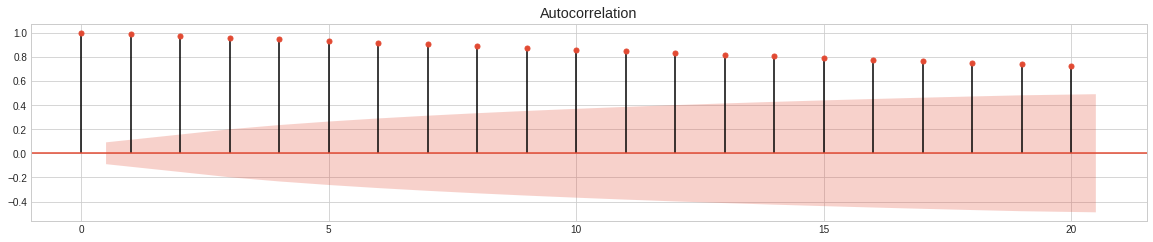

In [228]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.iloc[:,1], lags=20, ax=ax1)

In [229]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1.iloc[:,1])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print ('Wt%s: %.3f' % (key, value))

ADF Statistic: -2.178266
p-value: 0.214228
Critical Values:
Wt1%: -3.445
Wt5%: -2.868
Wt10%: -2.570


In [16]:
result

(-0.658956233273739,
 0.8570963611944069,
 4,
 465,
 {'1%': -3.4444914328761977,
  '10%': -2.570091378194011,
  '5%': -2.8677756786103683},
 2067.7177218833353)

In [ ]:
# p-valu가 0.05를 넘으므로, 귀무가설을 기각하지 못한다. (정상성만족 x)
# 이를 해결하기 위해 1차 차분



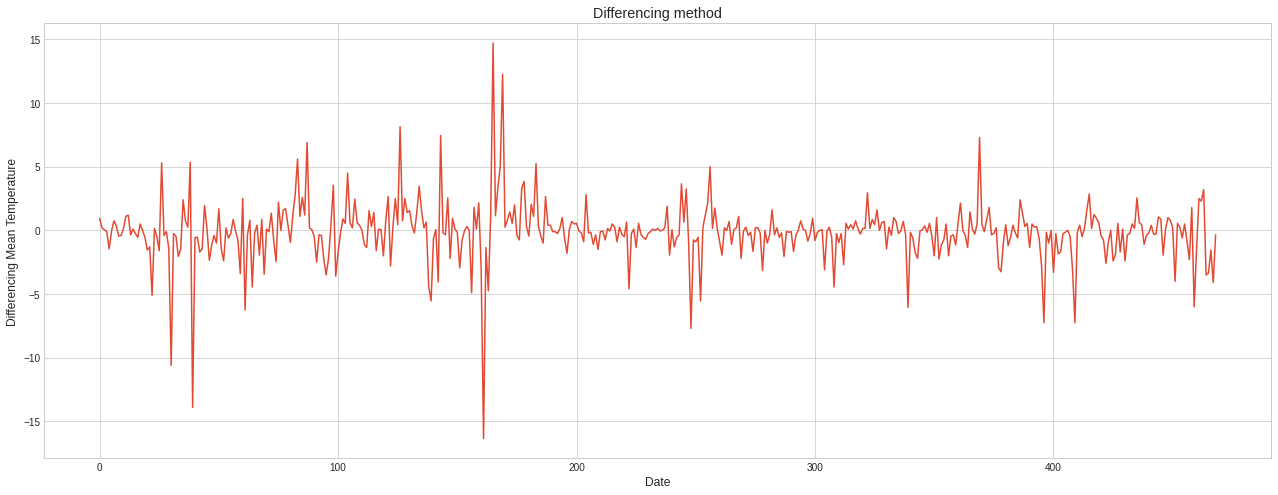

In [230]:
ts_diff = df1['Coal_price'] - df1['Coal_price'].shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [231]:
result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print ('Wt%s: %.3f' % (key, value))

ADF Statistic: -6.715399
p-value: 0.000000
Critical Values:
Wt1%: -3.445
Wt5%: -2.868
Wt10%: -2.570


In [232]:
ts_diff

469     NaN
468   -0.35
467   -4.10
466   -1.55
465   -3.35
       ... 
4     -1.45
3     -0.10
2      0.05
1      0.20
0      0.95
Name: Coal_price, Length: 470, dtype: float64

## p와 q결정
-정상성을 만족하는 차분된 데이터로 ACF와 PACF 그래프를 그려 ARIMA 모형의 
p와 q를 결정한다.

- 어떤 변수로 p와 q를 결정하는지 모르겠다 y로?

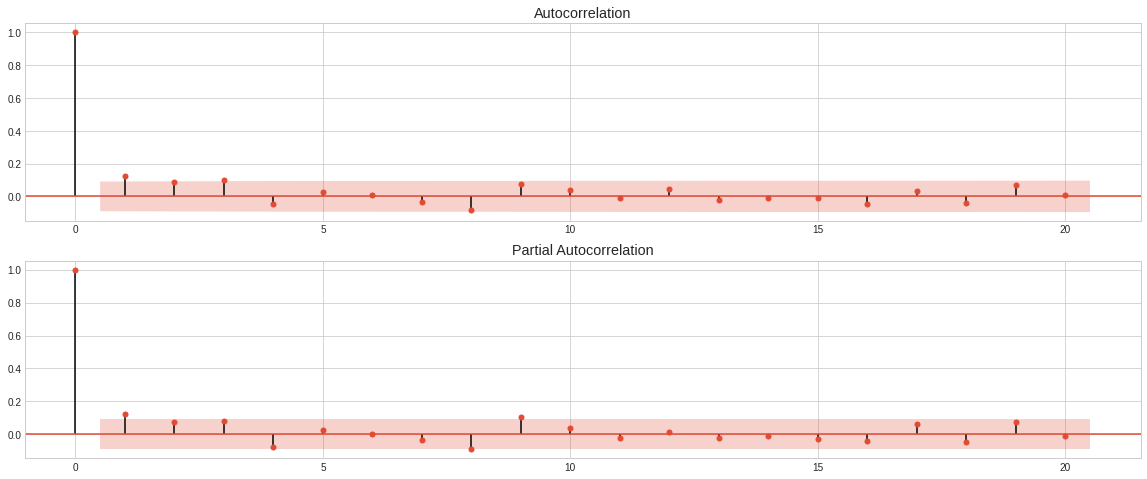

In [233]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:],lags = 20, ax = ax1 )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags = 20, ax = ax2) 

In [234]:
start_index = ts.index.max()

start_index

Timestamp('2019-12-29 00:00:00')

In [235]:
from datetime import datetime, timedelta
end_index = test['date'].max() - timedelta(days=1)

# ARIMA model

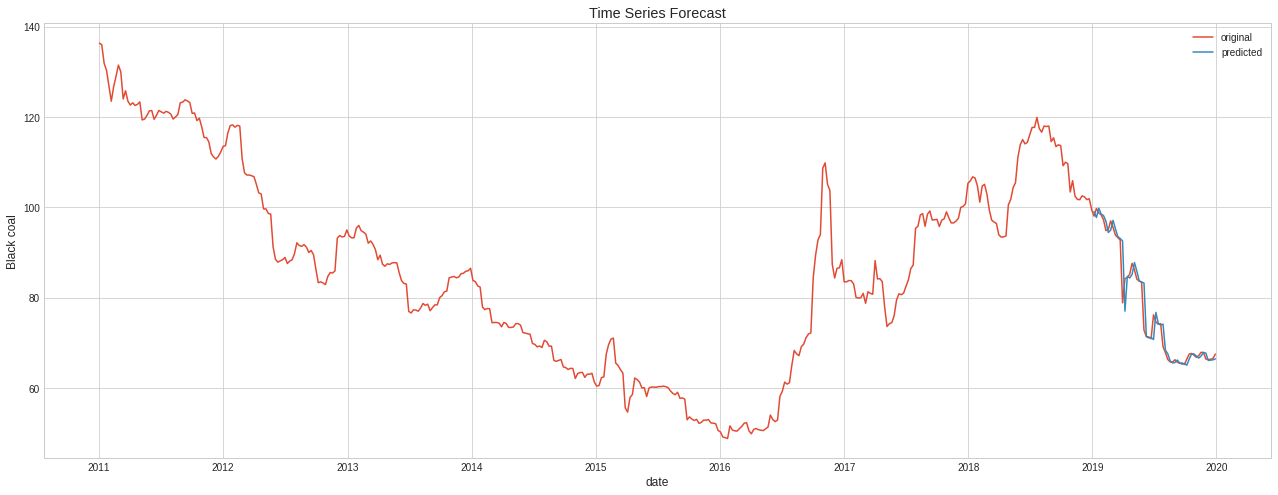

In [239]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from datetime import datetime, timedelta

# fit model
model = ARIMA(ts, order=(1,1,0))
model_fit = model.fit(disp = 0)

# predict
start_index = test['date'].min()
end_index = test['date'].max()
forecast = model_fit.predict(start = start_index, end = end_index, typ='levels')



# visualization
plt.figure(figsize=(22,8))
plt.plot(df1.date,df1.Coal_price,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("date")
plt.ylabel("Black coal")
plt.legend()
plt.show()

#다른방식


In [208]:
train_data, test_data = train_test_split(ts, test_size = 0.2, shuffle = False)

In [209]:
test_data

,Coal_price
date,
2018-03-18,96.75
2018-03-25,96.40
2018-04-01,93.90
2018-04-08,93.40
2018-04-15,93.45
...,...
2019-12-01,66.40
2019-12-08,66.30
2019-12-15,66.35


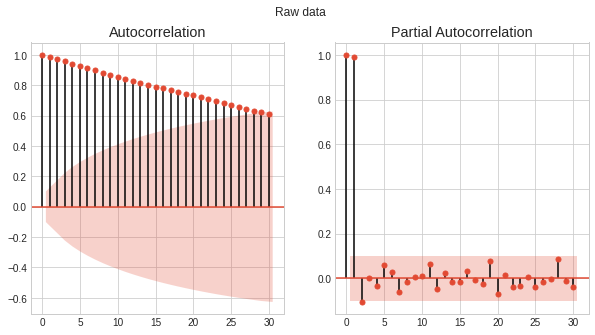

In [224]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags = 30, ax =ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags = 30, ax =ax[1]);

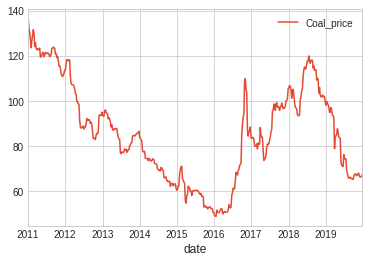

In [220]:
fig = ts.plot()

In [225]:
diff_train = train_data.copy()
diff_train = diff_train['Coal_price'].diff()
diff_train = diff_train.dropna()
print(train_data)
print(diff_train)


            Coal_price
date                  
2011-01-02      136.35
2011-01-09      136.00
2011-01-16      131.90
2011-01-23      130.35
2011-01-30      127.00
...                ...
2018-02-11      104.70
2018-02-18      105.10
2018-02-25      102.90
2018-03-04       99.40
2018-03-11       97.15

[376 rows x 1 columns]
date
2011-01-09   -0.35
2011-01-16   -4.10
2011-01-23   -1.55
2011-01-30   -3.35
2011-02-06   -3.50
              ... 
2018-02-11    3.55
2018-02-18    0.40
2018-02-25   -2.20
2018-03-04   -3.50
2018-03-11   -2.25
Name: Coal_price, Length: 375, dtype: float64


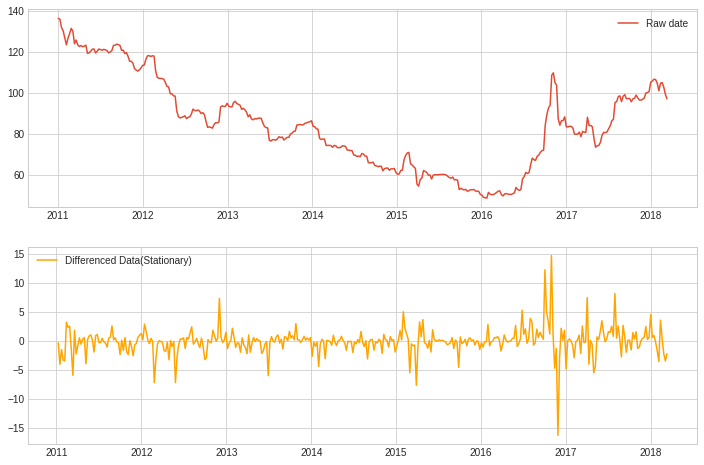

In [226]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['Coal_price'])
plt.legend(['Raw date'])
plt.subplot(212)
plt.plot(diff_train, 'orange')
plt.legend(['Differenced Data(Stationary)'])
plt.show()

In [213]:
model = ARIMA(train_data.values, order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  375
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -835.433
Method:                       css-mle   S.D. of innovations              2.245
Date:                Wed, 01 Jun 2022   AIC                           1676.866
Time:                        17:09:20   BIC                           1688.647
Sample:                             1   HQIC                          1681.543
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1060      0.142     -0.746      0.456      -0.384       0.172
ar.L1.D.y      0.1842      0.051      3.630      0.000       0.085       0.284
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.4289           +0.0000j            5.4289            0.0000
-----------------------------------------------------------------------------
"""

In [214]:
#parameter search
import itertools
print('examples of parameter')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq:
  model = ARIMA(train_data.values, order=(i))
  model_fit = model.fit()
  print(f'ARIMA: {i} >> AIC : {round(model_fit.aic,2)}')
  aic.append(round(model_fit.aic,2))

examples of parameter
ARIMA: (0, 1, 0) >> AIC : 1687.81
ARIMA: (0, 1, 1) >> AIC : 1678.22
ARIMA: (0, 1, 2) >> AIC : 1678.74
ARIMA: (1, 1, 0) >> AIC : 1676.87
ARIMA: (1, 1, 1) >> AIC : 1677.4


ValueError: ignored

In [215]:
optimal = [(pdq[i],j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((1, 1, 0), 1676.87)]

In [216]:
model_opt = ARIMA(train_data.values, order =optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  375
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -835.433
Method:                       css-mle   S.D. of innovations              2.245
Date:                Wed, 01 Jun 2022   AIC                           1676.866
Time:                        17:09:25   BIC                           1688.647
Sample:                             1   HQIC                          1681.543
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1060      0.142     -0.746      0.456      -0.384       0.172
ar.L1.D.y      0.1842      0.051      3.630      0.000       0.085       0.284
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.4289           +0.0000j            5.4289            0.0000
-----------------------------------------------------------------------------
"""

In [217]:
from sklearn.metrics import r2_score
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predicted_ub = prediction[2][:,0]
predicted_lb = prediction[2][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

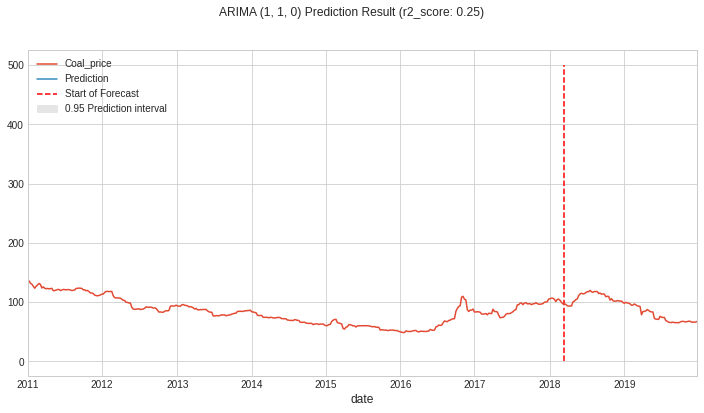

In [218]:
fig, ax = plt.subplots(figsize=(12,6))
ts.plot(ax = ax);
ax.vlines('2018-03-18', 0, 500, linestyle = '--', color = 'r', label = 'Start of Forecast');
ax.plot(predict_index, predicted_value, label= 'Prediction' )
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction interval')
ax.legend(loc = 'upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Result (r2_score: {round(r2,2)})')
plt.show()